In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
glass=pd.read_csv('/content/glass.csv')

In [3]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


we have to prepare a model which predict the type of glass using KNN

Let us get to know the data set

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


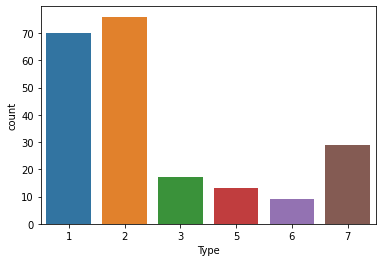

In [4]:
sns.countplot('Type',data=glass)

The type of glass as their count has been shown here,major groups are type 2&1

In [5]:
name=glass.columns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

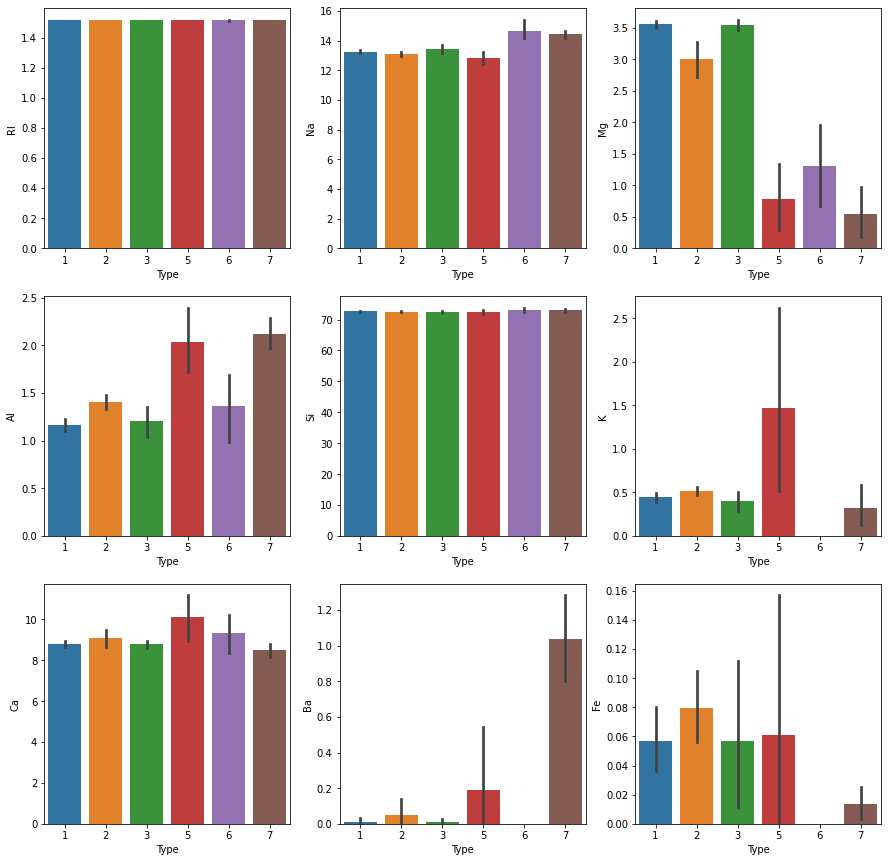

In [6]:
j=1
fig=plt.figure(figsize=(15,15))
for i in range(0,len(name)-1):
  plt.subplot(3,3,j)
  sns.barplot('Type',name[i],data=glass)
  j=j+1  

These graph help to get an overview of the data set

**EDA**

In [7]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


From this table we can make the decision that feature scaling is not required in this case as all the parameters are in the same scale

In [8]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


this show all the data types of the columns ,describe about the size of the dataset,and also about the no of null values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

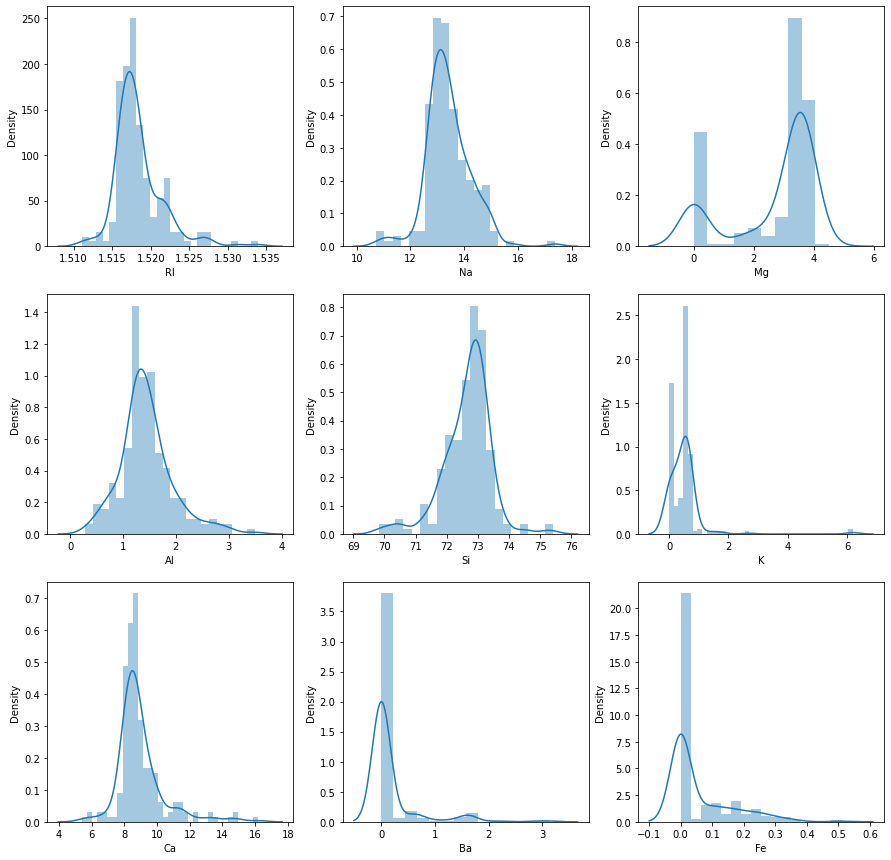

In [9]:
j=1
fig=plt.figure(figsize=(15,15))
for i in range(0,len(name)-1):
  plt.subplot(3,3,j)
  sns.distplot(glass[name[i]])
  j=j+1  

Histogram helps to find the distibution of each of columns in the data set

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

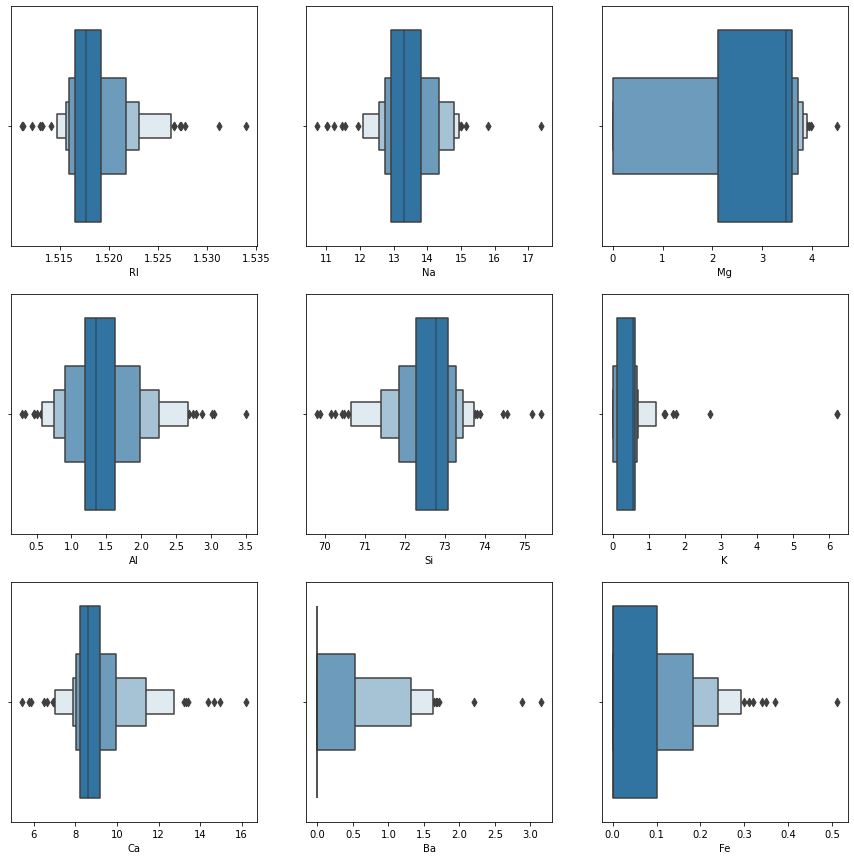

In [10]:
j=1
fig=plt.figure(figsize=(15,15))
for i in range(0,len(name)-1):
  plt.subplot(3,3,j)
  sns.boxenplot(glass[name[i]])
  j=j+1  

We do observe outliers in the case,let us now continue building the model without removing the outlier as there are only 214 data points

let us now check for missing values

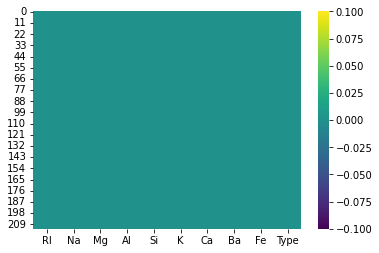

In [11]:
sns.heatmap(glass.isnull(),cmap='viridis')

In [12]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Here we can confirm the absence of missing values in the dataset

Let us check for duplicates in the dataset

In [13]:
glass.duplicated().sum()

1

the is one duplicate entery in the data set lets now drop the duplicate values

In [14]:
glass.drop_duplicates(inplace=True)

In [15]:
glass.duplicated().sum()

0

now there are no duplicate values present in the dataset

gives us the idea of correlation of each of the parametre with the target variable 

In [16]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


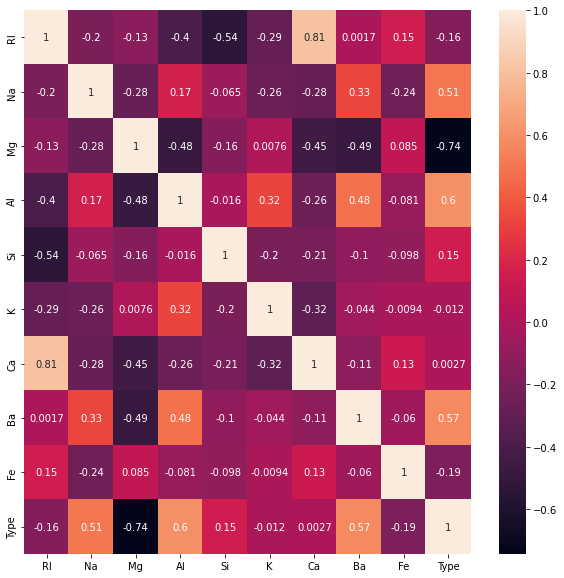

In [17]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(glass.corr(),annot=True)

Let us choose the dependent anad independent variable

In [18]:
X=glass.iloc[:,:-1]
y=glass.iloc[:,-1]

In [19]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

Splitting the model as traning and testing dataset

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)

In [22]:
X_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
16,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00
136,1.51806,13.00,3.80,1.08,73.07,0.56,8.38,0.00,0.12
123,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.00,0.00
22,1.51736,12.78,3.62,1.29,72.79,0.59,8.70,0.00,0.00
81,1.51593,13.25,3.45,1.43,73.17,0.61,7.86,0.00,0.00
...,...,...,...,...,...,...,...,...,...
68,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
193,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08
118,1.51673,13.30,3.64,1.53,72.53,0.65,8.03,0.00,0.29
48,1.52223,13.21,3.77,0.79,71.99,0.13,10.02,0.00,0.00


In [23]:
y_train

16     1
136    2
123    2
22     1
81     2
      ..
68     1
193    7
118    2
48     1
173    5
Name: Type, Length: 170, dtype: int64

**Building the model using Knearest neighbour alogorithm**

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier()
knn1.fit(X_train,y_train)

KNeighborsClassifier()

In [25]:
y_pred=knn1.predict(X_test)

Let us now evaluate the model

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [27]:
print(confusion_matrix(y_test,y_pred))

[[ 7  2  0  0  0  0]
 [ 5 12  0  0  1  0]
 [ 6  0  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  0  1]
 [ 1  0  0  0  0  5]]


In [28]:
print(accuracy_score(y_test,y_pred))

0.5813953488372093


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.37      0.78      0.50         9
           2       0.75      0.67      0.71        18
           3       0.00      0.00      0.00         6
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.58        43
   macro avg       0.49      0.46      0.45        43
weighted avg       0.55      0.58      0.55        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy score of this model is very low (58%) let us now try different methods like univariate feature selection or cross validation technique to improve the accuracy score

Let us change the no of neighbour values 

In [30]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski')
  knn.fit(X_train,y_train)
  pred_i=knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 1.0, 'error_rate vs k value')

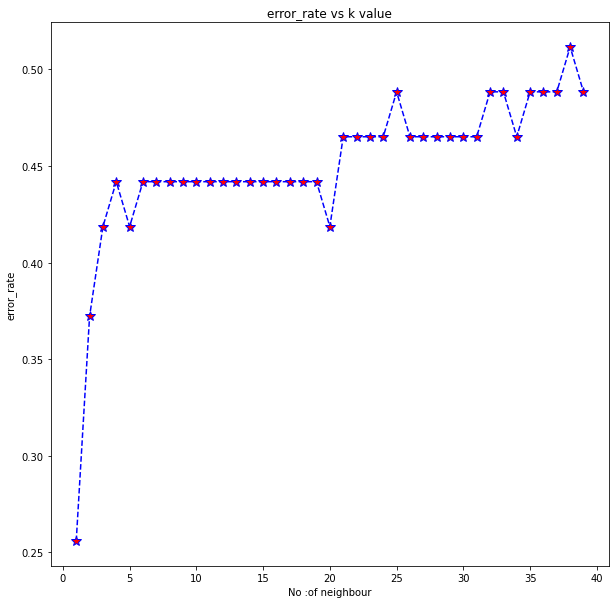

In [31]:
fig=plt.figure(figsize=(10,10))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.xlabel('No :of neighbour')
plt.ylabel('error_rate')
plt.title('error_rate vs k value')

In [58]:
knn=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
knn.fit(X_train,y_train)
y1_1pred=knn.predict(X_test)

In [57]:
print(classification_report(y_test,y1_1pred))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60         9
           2       0.86      0.67      0.75        18
           3       0.00      0.00      0.00         6
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         2
           7       0.83      0.83      0.83         6

    accuracy                           0.63        43
   macro avg       0.52      0.50      0.48        43
weighted avg       0.61      0.63      0.59        43



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy has improved to 63%

Let us now drop variable with less correlation 

In [34]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


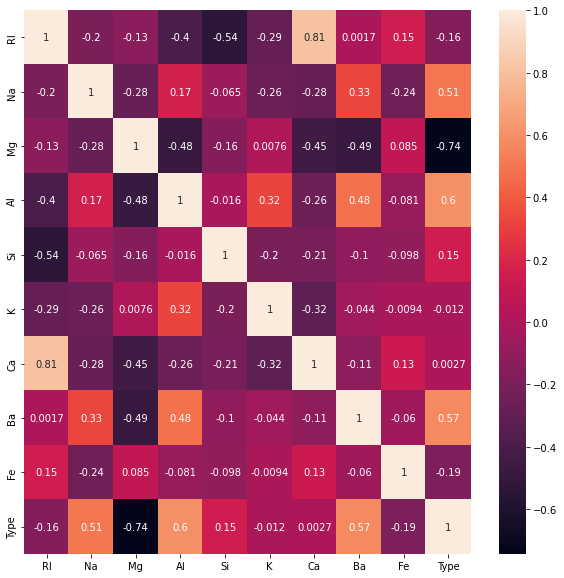

In [35]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(glass.corr(),annot=True)

Let us now drop paramater with has less correaltion with the target variable

from the heat map we can observe that ca and k are lesser impact on the target variable so let us now drop those columns and try building the model 

In [36]:
glass1=glass

In [37]:
glass1.drop(glass1[['K','Ca']],inplace=True,axis=1)

In [38]:
glass1.head()

,RI,Na,Mg,Al,Si,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.0,0.0,1


Let select X and y (independent and dependent vairable

In [39]:
X2=glass1.iloc[:,:-1]
y2=glass1.iloc[:,-1]

Splitting the data

In [40]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=.2,random_state=0)

In [41]:
knn2=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
knn2.fit(X2_train,y2_train)

KNeighborsClassifier(n_neighbors=4)

In [42]:
y2_pred=knn2.predict(X2_test)

In [43]:
print(confusion_matrix(y2_test,y2_pred))

[[ 9  0  0  0  0  0]
 [ 6 10  1  0  1  0]
 [ 5  0  1  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  0  0  0  1  1]
 [ 0  1  0  0  0  5]]


In [44]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           1       0.45      1.00      0.62         9
           2       0.83      0.56      0.67        18
           3       0.50      0.17      0.25         6
           5       1.00      0.50      0.67         2
           6       0.50      0.50      0.50         2
           7       0.83      0.83      0.83         6

    accuracy                           0.63        43
   macro avg       0.69      0.59      0.59        43
weighted avg       0.70      0.63      0.61        43



In [45]:
print(accuracy_score(y2_test,y2_pred))

0.627906976744186


In [46]:
for i in range(0,50):
  X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=.2,random_state=i)
  knn2=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
  knn2.fit(X2_train,y2_train)
  y2_pred=knn2.predict(X2_test)
  print(accuracy_score(y2_test,y2_pred),"===>",i)

0.627906976744186 ===> 0
0.7209302325581395 ===> 1
0.5581395348837209 ===> 2
0.6744186046511628 ===> 3
0.7441860465116279 ===> 4
0.6976744186046512 ===> 5
0.6744186046511628 ===> 6
0.7441860465116279 ===> 7
0.5348837209302325 ===> 8
0.6744186046511628 ===> 9
0.5581395348837209 ===> 10
0.627906976744186 ===> 11
0.6511627906976745 ===> 12
0.6976744186046512 ===> 13
0.7209302325581395 ===> 14
0.6046511627906976 ===> 15
0.6511627906976745 ===> 16
0.627906976744186 ===> 17
0.6511627906976745 ===> 18
0.6744186046511628 ===> 19
0.6046511627906976 ===> 20
0.6046511627906976 ===> 21
0.627906976744186 ===> 22
0.7209302325581395 ===> 23
0.5581395348837209 ===> 24
0.627906976744186 ===> 25
0.6976744186046512 ===> 26
0.6511627906976745 ===> 27
0.5813953488372093 ===> 28
0.627906976744186 ===> 29
0.5813953488372093 ===> 30
0.6511627906976745 ===> 31
0.7209302325581395 ===> 32
0.6046511627906976 ===> 33
0.6744186046511628 ===> 34
0.7209302325581395 ===> 35
0.7441860465116279 ===> 36
0.534883720930232

For random state 41 we are getting the highest accuracy

In [47]:
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=.2,random_state=41)
knn2=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
knn2.fit(X2_train,y2_train)
y2_pred=knn2.predict(X2_test)

In [48]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           1       0.68      1.00      0.81        15
           2       0.92      0.73      0.81        15
           3       1.00      0.20      0.33         5
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         6

    accuracy                           0.79        43
   macro avg       0.77      0.66      0.66        43
weighted avg       0.84      0.79      0.77        43



The accuracy of the model has increased to 79%

The accuracy of this model is 79% which is better compared to both the above models

let us now change the no of neighbour parameter

In [49]:
error_rate=[]
for i in range(1,40):
  knn3=KNeighborsClassifier(n_neighbors=i)
  knn3.fit(X2_train,y2_train)
  pred_i=knn3.predict(X2_test)
  error_rate.append(np.mean(pred_i != y2_test))

Text(0.5, 1.0, 'error_rate vs k value')

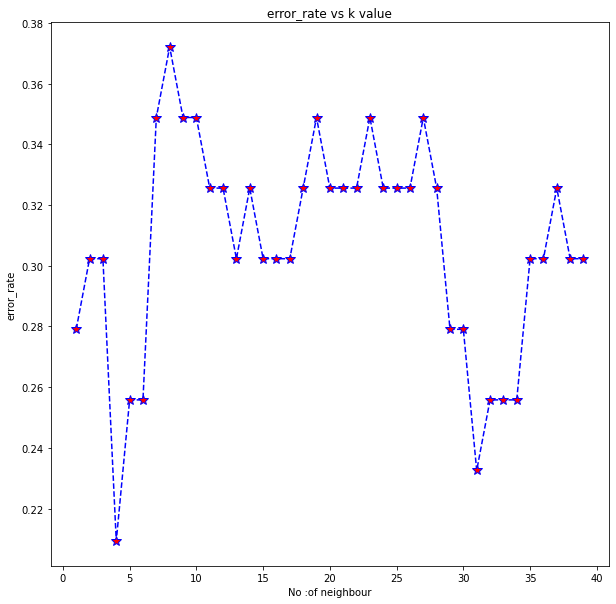

In [50]:
fig=plt.figure(figsize=(10,10))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='*',markerfacecolor='red',markersize=10)
plt.xlabel('No :of neighbour')
plt.ylabel('error_rate')
plt.title('error_rate vs k value')

From the above graph we can infert that the min error happens when n neighbors=4

In [60]:
knn4=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
knn4.fit(X2_train,y2_train)
y2_2pred=knn4.predict(X2_test)
print(classification_report(y2_test,y2_2pred))

              precision    recall  f1-score   support

           1       0.68      1.00      0.81        15
           2       0.92      0.73      0.81        15
           3       1.00      0.20      0.33         5
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         6

    accuracy                           0.79        43
   macro avg       0.77      0.66      0.66        43
weighted avg       0.84      0.79      0.77        43



There is no significat improvement in the model

Let us now change the cross validation technique

**Grid search technique for algorithm tuning**

In [65]:
glass3=glass1.copy()

In [66]:
glass.head()

,RI,Na,Mg,Al,Si,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.0,0.0,1


In [67]:
X3=glass3.iloc[:,:-1]
y3=glass3.iloc[:,-1]

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
num_folds = 10
kfold = KFold(n_splits=num_folds)

In [74]:
n_neighbors=np.array(range(1,40))
param_grid= dict(n_neighbors=n_neighbors)

In [75]:
n_neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

In [76]:
model3=KNeighborsClassifier()
grid=GridSearchCV(estimator=model3,param_grid=param_grid)
grid.fit(X3,y3)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [77]:
print(grid.best_score_)
print(grid.best_params_)

0.6201550387596899
{'n_neighbors': 1}


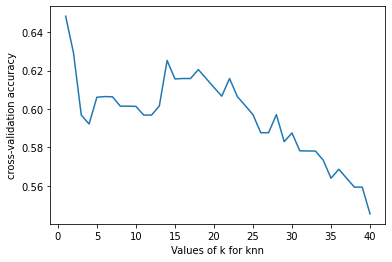

In [82]:
from sklearn.model_selection import cross_val_score
k_scores=[]
k_range=range(1,41)
for k in k_range:
  model5=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(model5,X,y,cv=5)
  k_scores.append(scores.mean())
#plot
plt.plot(k_range,k_scores)
plt.xlabel('Values of k for knn')
plt.ylabel('cross-validation accuracy')
plt.show()

Here using the grid search technique also we are getting a low accuracy score of 62%

We can conclude that there is no improvment in the accuracy of the model. So we have to select the model which gave us 79%